<a href="https://colab.research.google.com/github/RahulSinghPundir/SVM/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd

# Reading the data from my github repo
df=pd.read_csv("https://raw.githubusercontent.com/RahulSinghPundir/SVM/main/cell_samples.csv")
# Overview of our dataset
df.head()




,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


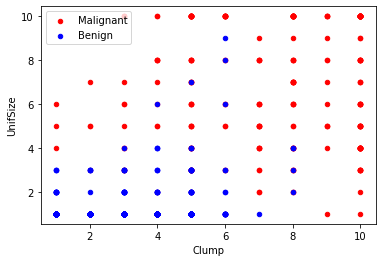

In [31]:
# Plotting the malignant and Beggin, to vizualize our dataset 
import matplotlib.pyplot as plt
ax=df[df['Class']==4].plot(kind='scatter',x='Clump', y='UnifSize',label='Malignant',color='red')
df[df['Class']==2].plot(kind='scatter',x='Clump', y='UnifSize',label='Benign',color='blue',ax=ax)
plt.show()

In [32]:
# Cheacking if any feature is non integer like BareNuc
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [33]:
# Make the non iteger (BareNuc) into integer
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [34]:
# Creating a set of independent and dependent
X=df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
Y=df[['Class']]

In [35]:
# Splitting the data into train and test with randomization
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=4)

In [36]:
# Verifying the shape of train and split
print(x_train.shape,y_test.shape)

(512, 9) (171, 1)


In [37]:
# Train the model in linear svm
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

# Predicting the value for x test
yhat=model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# Checking the accuracy and confusion matrix by which we can choose the best model 
from sklearn.metrics import accuracy_score,confusion_matrix
linear_accuracy=accuracy_score(yhat,y_test)
linear_confusion_matrix=confusion_matrix(yhat,y_test)

In [39]:
# Train the model in RBF svm
from sklearn import svm
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)

# Predicting the value for x test
yhat=model.predict(x_test)

# Checking the accuracy and confusion matrix 
rbf_accuracy=accuracy_score(yhat,y_test)
rbf_confusion_matrix=confusion_matrix(yhat,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# Train the model in RBF svm
from sklearn import svm
model=svm.SVC(kernel='sigmoid')
model.fit(x_train,y_train)

# Predicting the value for x test
yhat=model.predict(x_test)

# Checking the accuracy and confusion matrix 
sigmoid_accuracy=accuracy_score(yhat,y_test)
sigmoid_confusion_matrix=confusion_matrix(yhat,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("****************SVM of Linear*******************")
print("Linear Accuracy: ",linear_accuracy)
print("Linear Confusion Matrix: ",linear_confusion_matrix)
print("\n****************SVM of RBF(Radial basis Function)*******************")
print("RBF Accuracy: ",rbf_accuracy)
print("RBF Confusion Matrix: ",rbf_confusion_matrix)
print("\n****************SVM of Sigmoid*******************")
print("RBF Accuracy: ",sigmoid_accuracy)
print("RBF Confusion Matrix: ",sigmoid_confusion_matrix)

****************SVM of Linear*******************
Linear Accuracy:  0.9473684210526315
Linear Confusion Matrix:  [[102   1]
 [  8  60]]

****************SVM of RBF(Radial basis Function)*******************
RBF Accuracy:  0.9473684210526315
RBF Confusion Matrix:  [[102   1]
 [  8  60]]

****************SVM of Sigmoid*******************
RBF Accuracy:  0.4444444444444444
RBF Confusion Matrix:  [[76 61]
 [34  0]]
